In [1]:
import tensorflow as tf
import keras
from keras import backend as K
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt



Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
NUM_CLASSES = 10
cifar10_classes = ["airplane", "automobile", "bird", "cat", "deer", 
                   "dog", "frog", "horse", "ship", "truck"]

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten , Dense, Activation,Dropout
from keras import regularizers
from keras.layers.normalization import BatchNormalization


In [6]:
model = Sequential()
weight_decay = 1e-4
num_classes = 10
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)       

In [8]:
import numpy as np
from sklearn.metrics import classification_report , confusion_matrix, multilabel_confusion_matrix


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=50, batch_size=64,
                    validation_data=(test_images, test_labels))
y_pred=model.predict_classes(test_images)
yTest_priginal = np.argmax(test_labels,axis=1)
print(classification_report(test_labels,y_pred))
print(confusion_matrix(y_true=test_labels,y_pred=y_pred))





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 312us/step - loss: 1.8871 - acc: 0.4585 - val_loss: 1.3536 - val_acc: 0.5718
Epoch 2/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.3795 - acc: 0.6056 - val_loss: 1.3083 - val_acc: 0.6415
Epoch 3/50
50000/50000 [==============================] - 10s 210us/step - loss: 1.2078 - acc: 0.6700 - val_loss: 1.3051 - val_acc: 0.6388
Epoch 4/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.1296 - acc: 0.6919 - val_loss: 0.9402 - val_acc: 0.6979
Epoch 5/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.0098 - acc: 0.7108 - val_loss: 0.8941 - val_acc: 0.7208
Epoch 6/50
50000/50000 [==============================] - 10s 206us/step - loss: 0.7943 - acc: 0.7573 - val_loss: 0.9820 - val_acc: 0.6945
Epoch 7/50
50000/5

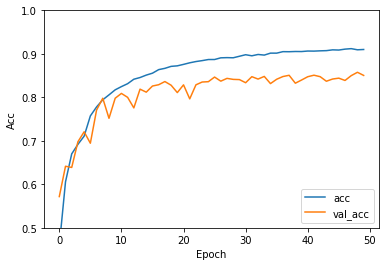

In [9]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label = 'val_acc')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(test_acc)

0.8504
